# Part III : Exploratory Data Analyses

> Jump to :  
* [Part 1](https://github.com/amypeniston/Coursera_Capstone/blob/master/Week_3_Scraping.ipynb) *Extracting Street Addresses & Coordinates* 
* [Part 2](https://github.com/amypeniston/Coursera_Capstone/blob/master/Week_3_Scraping.ipynb), *Extracting Foursquare Data*

## Step 1: Load up environment and data

In [9]:
import pandas as pd
import numpy as np

In [10]:
streetTrikkBussMetroTog = pd.read_csv('./streetData_TrikkBusMetroTog.csv')
streetTrikkBussMetroTog.head()

,Street,Street Latitude,Street Longitude,Trikk,Trikk Distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,T-bane_1,T-bane_2,T-bane_3,T-bane_4,Train Station
0,Gregers Grams vei,59.934876,10.647214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Åsbrekka,59.971559,10.664394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lilleborggata,59.936929,10.770171,Torshov (trikk),401.0,Buss 55 B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Simensbrekka,59.900778,10.783550,NaN,NaN,Underveis med 34 bussen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Krossveien,59.962550,10.764100,NaN,NaN,25-bussen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
streetTrikkBussMetroTog.shape

(2460, 28)

So, in all we have information on **2460** streets in Oslo, Norway

## Step 2: Find total transport options

In [22]:
#Check column type in the above dataframe
streetTrikkBussMetroTog.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')

In [35]:
#To find total transport options/street, we sum the columns that are NOT null, followed by sorting in descending order to obtain streets with maximum number of transport options

#First we must select the columns to sum on
busCOLS = list(range(18))

#Now we define a function that can automatically add text to numbers, useful for colns of T-bane
def makeColnName (list_of_colnNum):
    
    metroCOLSlist = []
    for i in list_of_colnNum:
        #print('T-bane_'+str(i))
        metroCOLSlist.append('T-bane_'+str(i))#Choose whatever colnName you want to prepend to the numbers
    return(metroCOLSlist)

#Makes columns of T-bane
COLSlist = makeColnName(list(range(1,5)))

#Join T-bane and bus lists together with additional list of Trikk+Tog
COLSlist = ['Trikk','Train Station']+ COLSlist + busCOLS
COLSlist#Total 24 transport colns, out of which max comes 22...wow...a street with 22 options..??

#Check data type in the list
#for i in COLSlist:
#    if (type(i)) == str:
#        print('YABBA',i)
#    else:
#        print('BOO',i)
#    
#    
#Convert int types to str types
def convertType (LIST):
    
    newLIST = list()
    for i in LIST:
        if type(i) == str:
            newLIST.append(i)
        else:
            #str(i)
            newLIST.append(str(i))
    
    return newLIST

COLSlist_str = convertType(COLSlist)

#Check correctly formatted
[type(i) for i in COLSlist_str]        

[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str]

In [41]:
#Sort in descending order of non-null values i.e. highest transport to lowest
streetTrikkBussMetroTog[COLSlist_str].notnull().sum(axis = 'columns').sort_values(ascending = False) 

#Also store this in a new coln named totalTransport
streetTrikkBussMetroTog['Total Transport']= streetTrikkBussMetroTog[COLSlist_str].notnull().sum(axis = 'columns').sort_values(ascending = False) #Sort in descending order of non-null values i.e. highest transport to lowest

In [42]:
#Obtain new index of the sorted order
newIndex = streetTrikkBussMetroTog[COLSlist_str].notnull().sum(axis = 'columns').sort_values(ascending = False).index 
newIndex

Int64Index([1993,  554, 1736, 1152, 2354,   79, 1654, 1555, 1439,  279,
            ...
            1136, 1134, 1126, 1124, 1122, 1115, 1101, 1092, 1091,    0],
           dtype='int64', length=2460)

In [43]:
#If you want to see all the values of the original dataframe (not the sorted)
streetTrikkBussMetroTog.index.values

array([   0,    1,    2, ..., 2457, 2458, 2459])

In [44]:
#Attempt to change old index to new custom ordered index
orderedStreetTrikkBussMetroTog = streetTrikkBussMetroTog.iloc[newIndex,]

#Right now, the index values will be like 554, 2354 etc, to get them in the order of 0,1,2...

#Get range for the index values
manualIndex2 = range(orderedStreetTrikkBussMetroTog.shape[0])

#Assign this new index
orderedStreetTrikkBussMetroTog.index = manualIndex2
orderedStreetTrikkBussMetroTog.head()

,Street,Street Latitude,Street Longitude,Trikk,Trikk Distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,T-bane_1,T-bane_2,T-bane_3,T-bane_4,Train Station,Total Transport
0,Lilletorget,59.913500,10.755900,Jernbanetorget (Trikk/B),356.0,buss 500,Buss 30,Buss 252,Buss 70,Buss 34,Buss 54,Buss 143,Buss 54,Buss 490E,platform 29 oslo bussterminal,Buss 111,Buss 31,Buss 31 E,Buss 542 Seiersten Ekspress,150 Oslo Bussterminal - Gullhaug - Oslo Busst...,plattform 20-Buss 501 enebakk-Lillestrøm,550 Oslo Bussterminal - Lillestrøm,Plattform 18 - Buss 411 Lillestrøm,"('Jernbanetorget (T)', 248)","('Grønland (T)', 318)",NaN,NaN,"('Oslo Sentralstasjon', 332)",22
1,Europarådets plass,59.912000,10.749300,Jernbanetorget (Trikk/B),48.0,Buss 31 E,Buss 34,Buss 542 Seiersten Ekspress,Buss 54,Buss 82E,Buss 143,Buss 542 Til Drøbak,Buss 37,Buss 70,Buss 54,Buss 30,Buss 252,buss 500,Buss 83,Buss 31,81B-Bussen,81A-bussen,platform 29 oslo bussterminal,"('Jernbanetorget (T)', 164)","('Stortinget (T)', 420)",NaN,NaN,"('Oslo Sentralstasjon', 300)",22
2,Brugata,59.914005,10.755774,Jernbanetorget (Trikk/B),375.0,Buss 30,buss 500,Buss 252,Buss 54,Buss 70,Buss 34,Buss 111,Buss 143,Buss 490E,Buss 54,Buss 31,Buss 31 E,platform 29 oslo bussterminal,150 Oslo Bussterminal - Gullhaug - Oslo Busst...,plattform 20-Buss 501 enebakk-Lillestrøm,550 Oslo Bussterminal - Lillestrøm,Plattform 18 - Buss 411 Lillestrøm,NaN,"('Jernbanetorget (T)', 277)","('Grønland (T)', 345)",NaN,NaN,"('Oslo Sentralstasjon', 384)",21
3,Pløens gate,59.913900,10.749325,Jernbanetorget (Trikk/B),187.0,Buss 54,Buss 31,Buss 54,Buss 30,Buss 37,Buss 34,Buss 31 E,Buss 70,Buss 143,Buss 252,Buss 82E,Buss 542 Til Drøbak,buss 500,Buss 542 Seiersten Ekspress,81A-bussen,81B-Bussen,platform 29 oslo bussterminal,NaN,"('Jernbanetorget (T)', 241)","('Stortinget (T)', 428)",NaN,NaN,"('Oslo Sentralstasjon', 443)",21
4,Sonja Henies plass,59.912700,10.755500,NaN,NaN,Buss 252,platform 29 oslo bussterminal,buss 500,Buss 70,Buss 30,Buss 143,Buss 34,Buss 490E,Buss 54,Buss 54,Buss 31 E,Buss 82E,Buss 31,Buss 542 Seiersten Ekspress,Buss 111,150 Oslo Bussterminal - Gullhaug - Oslo Busst...,550 Oslo Bussterminal - Lillestrøm,plattform 20-Buss 501 enebakk-Lillestrøm,"('Jernbanetorget (T)', 190)","('Grønland (T)', 327)",NaN,NaN,"('Oslo Sentralstasjon', 240)",21


In [48]:
#Find total bus options, but first convert the busCOLS to str
busCOLS_str = convertType(busCOLS)
orderedStreetTrikkBussMetroTog[busCOLS_str].notnull().sum(axis = 'columns').sort_values(ascending = False) #Sort in descending order of non-null values i.e. highest transport to lowest

#Add this info as a new column
orderedStreetTrikkBussMetroTog['Total Bus'] = orderedStreetTrikkBussMetroTog[busCOLS_str].notnull().sum(axis = 'columns').sort_values(ascending = False)
orderedStreetTrikkBussMetroTog.head()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Street,Street Latitude,Street Longitude,Trikk,Trikk Distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,T-bane_1,T-bane_2,T-bane_3,T-bane_4,Train Station,Total Transport,Total Bus
0,Lilletorget,59.913500,10.755900,Jernbanetorget (Trikk/B),356.0,buss 500,Buss 30,Buss 252,Buss 70,Buss 34,Buss 54,Buss 143,Buss 54,Buss 490E,platform 29 oslo bussterminal,Buss 111,Buss 31,Buss 31 E,Buss 542 Seiersten Ekspress,150 Oslo Bussterminal - Gullhaug - Oslo Busst...,plattform 20-Buss 501 enebakk-Lillestrøm,550 Oslo Bussterminal - Lillestrøm,Plattform 18 - Buss 411 Lillestrøm,"('Jernbanetorget (T)', 248)","('Grønland (T)', 318)",NaN,NaN,"('Oslo Sentralstasjon', 332)",22,18
1,Europarådets plass,59.912000,10.749300,Jernbanetorget (Trikk/B),48.0,Buss 31 E,Buss 34,Buss 542 Seiersten Ekspress,Buss 54,Buss 82E,Buss 143,Buss 542 Til Drøbak,Buss 37,Buss 70,Buss 54,Buss 30,Buss 252,buss 500,Buss 83,Buss 31,81B-Bussen,81A-bussen,platform 29 oslo bussterminal,"('Jernbanetorget (T)', 164)","('Stortinget (T)', 420)",NaN,NaN,"('Oslo Sentralstasjon', 300)",22,18
2,Brugata,59.914005,10.755774,Jernbanetorget (Trikk/B),375.0,Buss 30,buss 500,Buss 252,Buss 54,Buss 70,Buss 34,Buss 111,Buss 143,Buss 490E,Buss 54,Buss 31,Buss 31 E,platform 29 oslo bussterminal,150 Oslo Bussterminal - Gullhaug - Oslo Busst...,plattform 20-Buss 501 enebakk-Lillestrøm,550 Oslo Bussterminal - Lillestrøm,Plattform 18 - Buss 411 Lillestrøm,NaN,"('Jernbanetorget (T)', 277)","('Grønland (T)', 345)",NaN,NaN,"('Oslo Sentralstasjon', 384)",21,17
3,Pløens gate,59.913900,10.749325,Jernbanetorget (Trikk/B),187.0,Buss 54,Buss 31,Buss 54,Buss 30,Buss 37,Buss 34,Buss 31 E,Buss 70,Buss 143,Buss 252,Buss 82E,Buss 542 Til Drøbak,buss 500,Buss 542 Seiersten Ekspress,81A-bussen,81B-Bussen,platform 29 oslo bussterminal,NaN,"('Jernbanetorget (T)', 241)","('Stortinget (T)', 428)",NaN,NaN,"('Oslo Sentralstasjon', 443)",21,17
4,Sonja Henies plass,59.912700,10.755500,NaN,NaN,Buss 252,platform 29 oslo bussterminal,buss 500,Buss 70,Buss 30,Buss 143,Buss 34,Buss 490E,Buss 54,Buss 54,Buss 31 E,Buss 82E,Buss 31,Buss 542 Seiersten Ekspress,Buss 111,150 Oslo Bussterminal - Gullhaug - Oslo Busst...,550 Oslo Bussterminal - Lillestrøm,plattform 20-Buss 501 enebakk-Lillestrøm,"('Jernbanetorget (T)', 190)","('Grønland (T)', 327)",NaN,NaN,"('Oslo Sentralstasjon', 240)",21,18


In [54]:
#Find total streets with least amount of transport options
print ('A total of ', orderedStreetTrikkBussMetroTog[orderedStreetTrikkBussMetroTog['Total Transport'] == 0].shape[0],'streets seem to have NO transport option within 400m')

A total of  630 streets seem to have NO transport option within 400m


In [52]:
orderedStreetTrikkBussMetroTog.shape

(2460, 30)

## Step 6: Exploratory Analysis 

Let us explore some of the streets with the most, the least transport options. Let us also review the distribution of transport options across all streets.

### 6.1 Top 10 streets with most transport options within 400m

In [50]:
#sns.set(rc={'figure.figsize':(12,9)})
top_streets = orderedStreetTrikkBussMetroTog.head(10)
top_streets.head()

,Street,Street Latitude,Street Longitude,Trikk,Trikk Distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,T-bane_1,T-bane_2,T-bane_3,T-bane_4,Train Station,Total Transport,Total Bus
0,Lilletorget,59.913500,10.755900,Jernbanetorget (Trikk/B),356.0,buss 500,Buss 30,Buss 252,Buss 70,Buss 34,Buss 54,Buss 143,Buss 54,Buss 490E,platform 29 oslo bussterminal,Buss 111,Buss 31,Buss 31 E,Buss 542 Seiersten Ekspress,150 Oslo Bussterminal - Gullhaug - Oslo Busst...,plattform 20-Buss 501 enebakk-Lillestrøm,550 Oslo Bussterminal - Lillestrøm,Plattform 18 - Buss 411 Lillestrøm,"('Jernbanetorget (T)', 248)","('Grønland (T)', 318)",NaN,NaN,"('Oslo Sentralstasjon', 332)",22,18
1,Europarådets plass,59.912000,10.749300,Jernbanetorget (Trikk/B),48.0,Buss 31 E,Buss 34,Buss 542 Seiersten Ekspress,Buss 54,Buss 82E,Buss 143,Buss 542 Til Drøbak,Buss 37,Buss 70,Buss 54,Buss 30,Buss 252,buss 500,Buss 83,Buss 31,81B-Bussen,81A-bussen,platform 29 oslo bussterminal,"('Jernbanetorget (T)', 164)","('Stortinget (T)', 420)",NaN,NaN,"('Oslo Sentralstasjon', 300)",22,18
2,Brugata,59.914005,10.755774,Jernbanetorget (Trikk/B),375.0,Buss 30,buss 500,Buss 252,Buss 54,Buss 70,Buss 34,Buss 111,Buss 143,Buss 490E,Buss 54,Buss 31,Buss 31 E,platform 29 oslo bussterminal,150 Oslo Bussterminal - Gullhaug - Oslo Busst...,plattform 20-Buss 501 enebakk-Lillestrøm,550 Oslo Bussterminal - Lillestrøm,Plattform 18 - Buss 411 Lillestrøm,NaN,"('Jernbanetorget (T)', 277)","('Grønland (T)', 345)",NaN,NaN,"('Oslo Sentralstasjon', 384)",21,17
3,Pløens gate,59.913900,10.749325,Jernbanetorget (Trikk/B),187.0,Buss 54,Buss 31,Buss 54,Buss 30,Buss 37,Buss 34,Buss 31 E,Buss 70,Buss 143,Buss 252,Buss 82E,Buss 542 Til Drøbak,buss 500,Buss 542 Seiersten Ekspress,81A-bussen,81B-Bussen,platform 29 oslo bussterminal,NaN,"('Jernbanetorget (T)', 241)","('Stortinget (T)', 428)",NaN,NaN,"('Oslo Sentralstasjon', 443)",21,17
4,Sonja Henies plass,59.912700,10.755500,NaN,NaN,Buss 252,platform 29 oslo bussterminal,buss 500,Buss 70,Buss 30,Buss 143,Buss 34,Buss 490E,Buss 54,Buss 54,Buss 31 E,Buss 82E,Buss 31,Buss 542 Seiersten Ekspress,Buss 111,150 Oslo Bussterminal - Gullhaug - Oslo Busst...,550 Oslo Bussterminal - Lillestrøm,plattform 20-Buss 501 enebakk-Lillestrøm,"('Jernbanetorget (T)', 190)","('Grønland (T)', 327)",NaN,NaN,"('Oslo Sentralstasjon', 240)",21,18


### 6.2 10 streets with least transport options within 400m

In [55]:
bottom_streets = orderedStreetTrikkBussMetroTog.tail(10)
bottom_streets.head()

,Street,Street Latitude,Street Longitude,Trikk,Trikk Distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,T-bane_1,T-bane_2,T-bane_3,T-bane_4,Train Station,Total Transport,Total Bus
2450,Hellerudstubben,59.917345,10.848599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2451,Gamle Herregårdsvei,59.844156,10.783600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2452,Vassfaret,59.953521,10.681836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2453,Vekterveien,59.890663,10.812804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2454,Tryvannsveien,59.984529,10.669471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

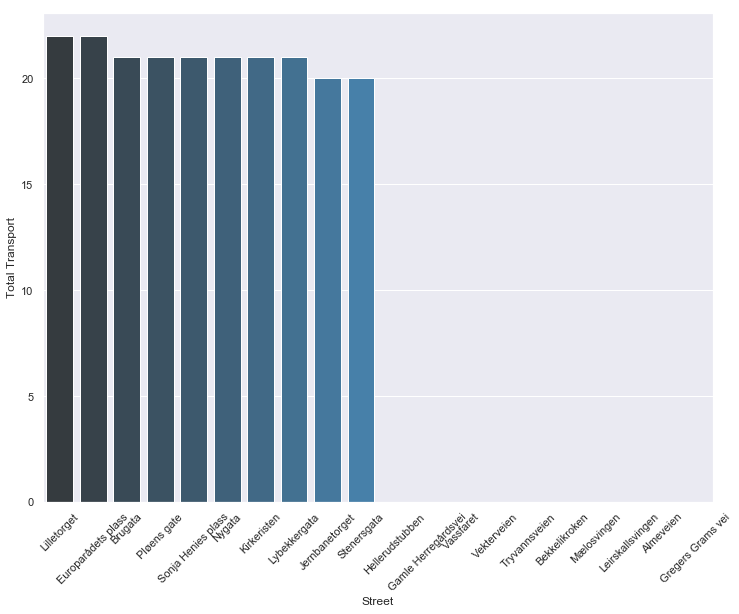

In [61]:
#Let us combine the top10 and bottom 10 dataframes into a single dataframe
#We will use pd.concat that takes in a LIST of dataframes to concat
df_list = [top_streets, bottom_streets]
combinedTop10_bottom10streets = pd.concat(df_list)
#combinedTop10_bottom10streets

#Let us visualise this
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})

sns.barplot(x = 'Street', y = 'Total Transport', data = combinedTop10_bottom10streets, palette = 'Blues_d')
plt.xticks(rotation = 45)

### 6.3 Distribution of transport options across all streets

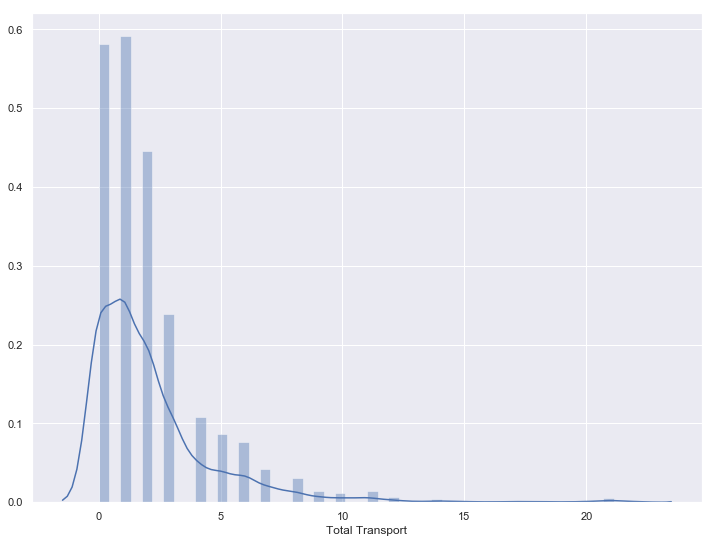

In [62]:
sns.distplot(orderedStreetTrikkBussMetroTog['Total Transport'])

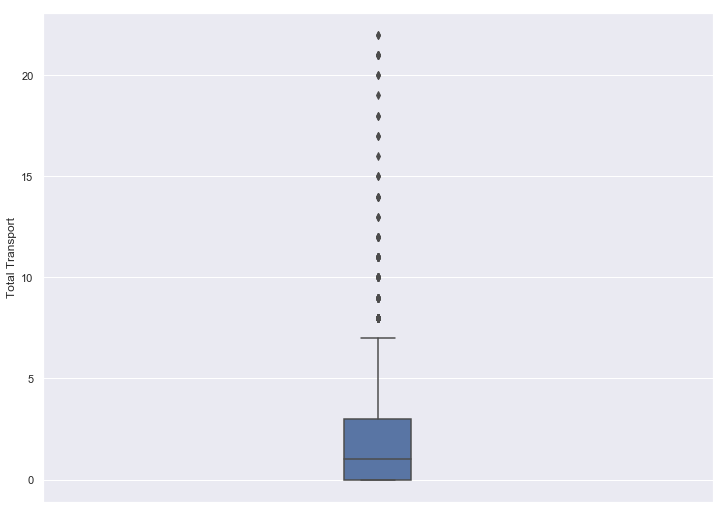

In [63]:
sns.boxplot(y = orderedStreetTrikkBussMetroTog['Total Transport'], width = 0.1)

### 6.4 Visualise relation between total bus options and total transport

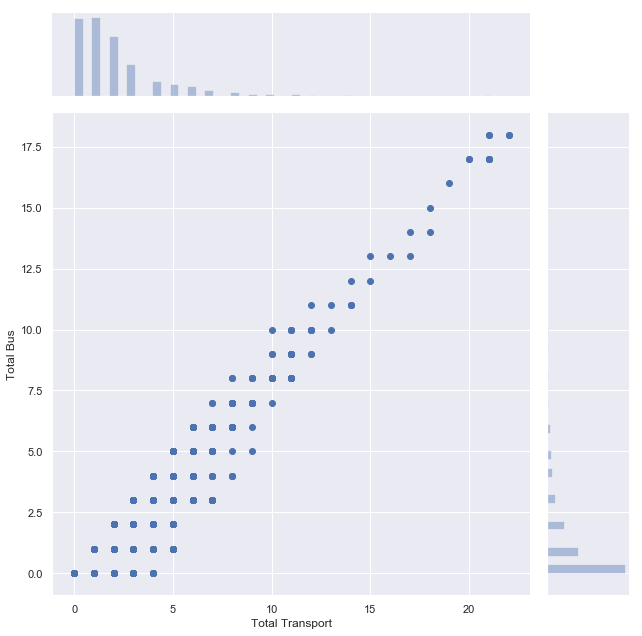

In [64]:
sns.jointplot(x = 'Total Transport', y = 'Total Bus', data = orderedStreetTrikkBussMetroTog, height= 9)

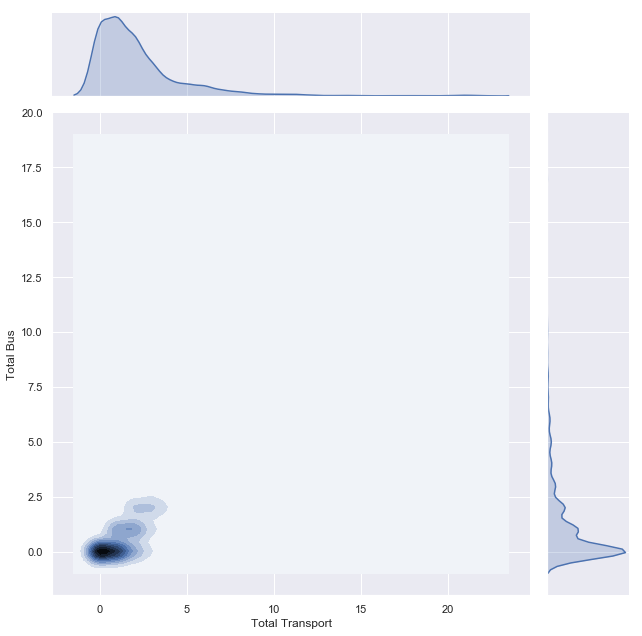

In [65]:
#Make a density plot version of the above
sns.jointplot(x = 'Total Transport', y = 'Total Bus', kind = 'kde', data = orderedStreetTrikkBussMetroTog, height = 9)

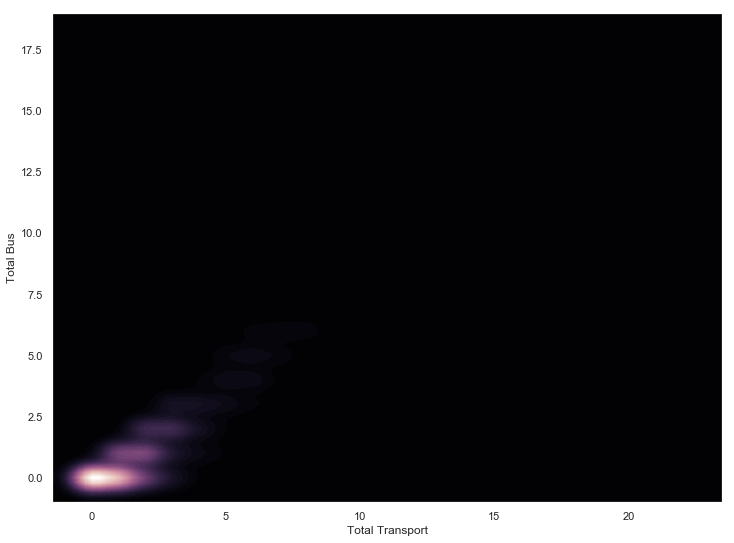

In [66]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(orderedStreetTrikkBussMetroTog['Total Transport'], orderedStreetTrikkBussMetroTog['Total Bus'], cmap=cmap, n_levels=60, shade=True);


### 6.4 Divide streets based on no. of transport options

In [67]:
bins = np.linspace(min(orderedStreetTrikkBussMetroTog['Total Transport']), max(orderedStreetTrikkBussMetroTog['Total Transport']), 8)#Provide 1 more than the number of levels to create
bins

array([ 0.        ,  3.14285714,  6.28571429,  9.42857143, 12.57142857,
       15.71428571, 18.85714286, 22.        ])

In [69]:
group_names = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-22']

In [70]:
orderedStreetTrikkBussMetroTog['Binned Transport'] = pd.cut(orderedStreetTrikkBussMetroTog['Total Transport'], bins, labels = group_names, include_lowest= True)
orderedStreetTrikkBussMetroTog[['Binned Transport','Total Transport']].head(20)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Binned Transport,Total Transport
0,19-22,22
1,19-22,22
2,19-22,21
3,19-22,21
4,19-22,21
5,19-22,21
6,19-22,21
7,19-22,21
8,19-22,20
9,19-22,20


#### Let us find out how many streets belong to each category

In [71]:
orderedStreetTrikkBussMetroTog['Binned Transport'].value_counts()

0-3      2012
4-6       294
7-9        95
10-12      35
19-22      11
13-15       8
16-18       5
Name: Binned Transport, dtype: int64

#### Let us try to visualise this to get a better perspective...

In [72]:
new_df = orderedStreetTrikkBussMetroTog['Binned Transport'].value_counts().to_frame()
new_df

,Binned Transport
0-3,2012
4-6,294
7-9,95
10-12,35
19-22,11
13-15,8
16-18,5


In [73]:
new_df.reset_index(inplace = True)
new_df.columns = ['Transport Options', 'Total Streets']
new_df

,Transport Options,Total Streets
0,0-3,2012
1,4-6,294
2,7-9,95
3,10-12,35
4,19-22,11
5,13-15,8
6,16-18,5


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

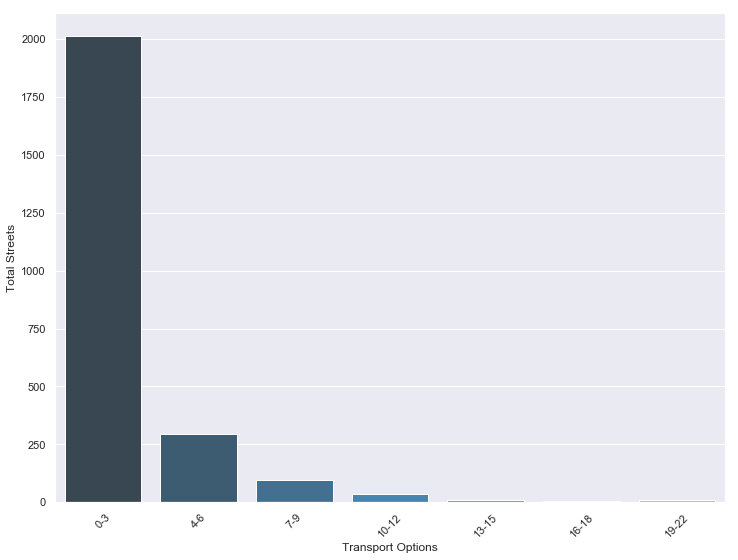

In [74]:
sns.barplot(x = 'Transport Options', y = 'Total Streets', data = new_df, palette= 'Blues_d')
plt.xticks(rotation = 45)

In [75]:
#Save to drive
orderedStreetTrikkBussMetroTog.to_csv(path_or_buf='./orderedStreetTrikkBusMetroTog.csv', index = False)